In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from scipy.signal import savgol_filter

In [3]:
def unpack_data(fname, skiprows=23):
    df=pd.read_csv(fname, skiprows=skiprows)
    df = df.rename(columns = {'Time (s)': 't', 'Channel 1 (V)': 'V1', 'Channel 2 (V)':'V2'})
    return df

font = {'size'   : 20}

matplotlib.rc('font', **font)

In [4]:
df = pd.read_csv('data/geo_construct_c_data_1', sep='\t')
print(df)
df = df.rename(columns = {'time': 't', 'V(n1)': 'V0', 'V(n2)': 'V1', 'V(n3)': 'V2', 'V(n4)': 'V3', 
                     'I(Ndr1)':'I1', 'I(Ndr2)':'I2', 'I(Ndr3)':'I3',
                    'I(R1)':'IR1', 'I(V1)': 'I0'})

df['dV1'] = df.V1 - df.V2
df['dV2'] = df.V2 - df.V3
df['dV3'] = df.V3
df['dVR'] = df.V0 - df.V1

           time     V(n1)         V(n2)         V(n3)         V(n4)  \
0      0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
1      0.010063  0.010063  6.054062e-03  4.231769e-03  2.227247e-03   
2      0.020303  0.020303  1.221455e-02  8.537926e-03  4.493645e-03   
3      0.030543  0.030543  1.837503e-02  1.284408e-02  6.760044e-03   
4      0.040783  0.040783  2.453551e-02  1.715024e-02  9.026442e-03   
...         ...       ...           ...           ...           ...   
4224  39.974491  0.025509  1.534630e-02  1.072702e-02  5.645798e-03   
4225  39.984731  0.015269  9.185821e-03  6.420858e-03  3.379399e-03   
4226  39.994971  0.005029  3.025338e-03  2.114701e-03  1.113001e-03   
4227  39.999991  0.000009  5.257518e-06  3.675007e-06  1.934226e-06   
4228  40.000000  0.000000  2.429142e-10  1.887057e-10  1.109676e-10   

             I(C1)         I(C2)         I(C3)       I(Ndr1)       I(Ndr2)  \
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.00000

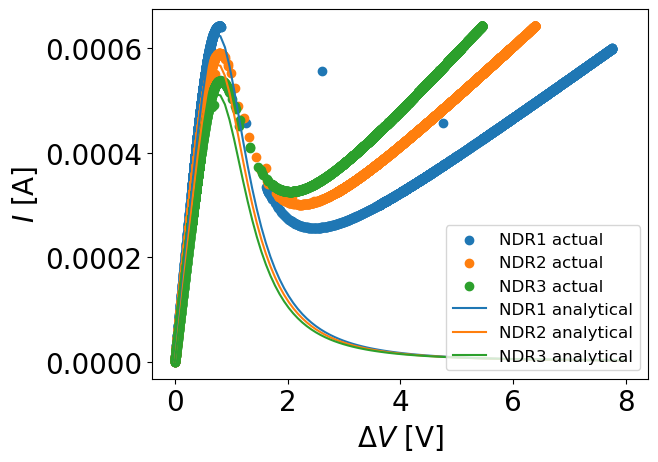

In [14]:
def R(dV, k=1, Vrecip=1):
    numer = (1 + dV**4)
    denom = k*(1 + (Vrecip*dV)**4)
    return numer/denom

def Icurve(dV, k=1, Vrecip=1):
    return dV/R(dV, k, Vrecip)

dVref = np.linspace(0, 8, num=100)
I1curve = Icurve(dVref, k=0.0011, Vrecip=0.07)
I2curve = Icurve(dVref, k=0.001, Vrecip=0.1)
I3curve = Icurve(dVref, k=0.0009, Vrecip=0.13)

fig, ax = plt.subplots()
ax.scatter(df.dV1, df.I1, label='NDR1 actual')
ax.scatter(df.dV2, df.I2, label='NDR2 actual')
ax.scatter(df.dV3, df.I3, label='NDR3 actual')

ax.plot(dVref, I1curve, label='NDR1 analytical')
ax.plot(dVref, I2curve, label='NDR2 analytical')
ax.plot(dVref, I3curve, label='NDR3 analytical')
ax.legend(fontsize=12)

ax.set_xlabel(r'$\Delta V$ [V]')
ax.set_ylabel(r'$I$ [A]')
fig.savefig('3NDR_geo_IVcurve_discrepancy.png')